In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Load the Dataset

In [9]:
df = pd.read_csv(r'C:\Users\admin\Desktop\PYTHON LEARNING\jupyter notebook practice\titanic-survival-analysis\DataSet\Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Initial Inspection

In [10]:
df.shape

(891, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## cheaking missing values

In [13]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [15]:
df.drop(columns=['Ticket'], inplace=True)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [17]:
df.rename(columns={'Pclass': 'PassengerClass', 'SibSp': 'SiblingsSpousesAboard',
                   'Parch': 'ParentsChildrenAboard'}, inplace=True)
df.head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SiblingsSpousesAboard,ParentsChildrenAboard,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [18]:
# Extract titles like Mr, Mrs, etc.
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

df['Title'].value_counts()


Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64

In [19]:
df['FamilySize'] = df['SiblingsSpousesAboard'] + df['ParentsChildrenAboard'] + 1


In [20]:
df.head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SiblingsSpousesAboard,ParentsChildrenAboard,Fare,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1


In [21]:
df.to_csv('cleaned_titanic.csv', index=False)

## Exploratory Data Analysis (EDA)

In [22]:
df['Survived'].value_counts(normalize=True).map("{:.2%}".format)

Survived
0    61.62%
1    38.38%
Name: proportion, dtype: object

In [23]:
df.groupby('Sex')['Survived'].mean().map("{:.2%}".format)

Sex
female    74.20%
male      18.89%
Name: Survived, dtype: object

In [24]:
df.groupby('PassengerClass')['Survived'].mean().map("{:.2%}".format)

PassengerClass
1    62.96%
2    47.28%
3    24.24%
Name: Survived, dtype: object

In [25]:
df.groupby('Embarked')['Survived'].mean().map("{:.2%}".format)

Embarked
C    55.36%
Q    38.96%
S    33.90%
Name: Survived, dtype: object

In [26]:
df.groupby('Title')['Survived'].mean().map("{:.2%}".format)

Title
Master    57.50%
Miss      69.78%
Mr        15.67%
Mrs       79.20%
Rare      44.44%
Name: Survived, dtype: object

In [27]:
df.groupby('FamilySize')['Survived'].mean().sort_index()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [28]:
correlation = df.corr(numeric_only=True)
correlation['Survived'].sort_values(ascending=False)

Survived                 1.000000
Fare                     0.257307
ParentsChildrenAboard    0.081629
FamilySize               0.016639
PassengerId             -0.005007
SiblingsSpousesAboard   -0.035322
Age                     -0.064910
PassengerClass          -0.338481
Name: Survived, dtype: float64

### 🔍 Key Insights from EDA

- Women had a much higher survival rate than men.
- 1st class passengers were far more likely to survive than 3rd class.
- Port of embarkation had noticeable differences in survival likelihood.
- Passengers with small families (2–4 members) had better survival rates.
- Titles like “Mrs”, “Miss”, and “Master” were strongly associated with higher survival.



  ## Visual analytics

In [29]:
#styling
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

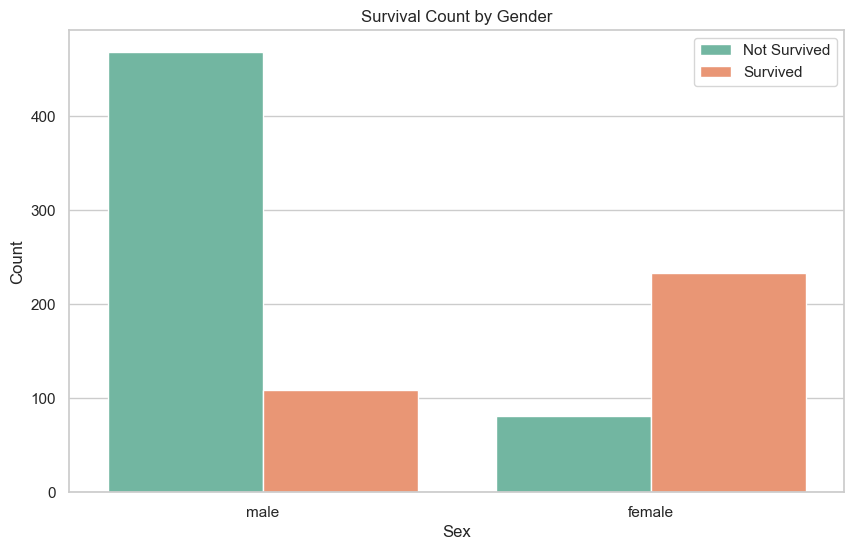

In [51]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

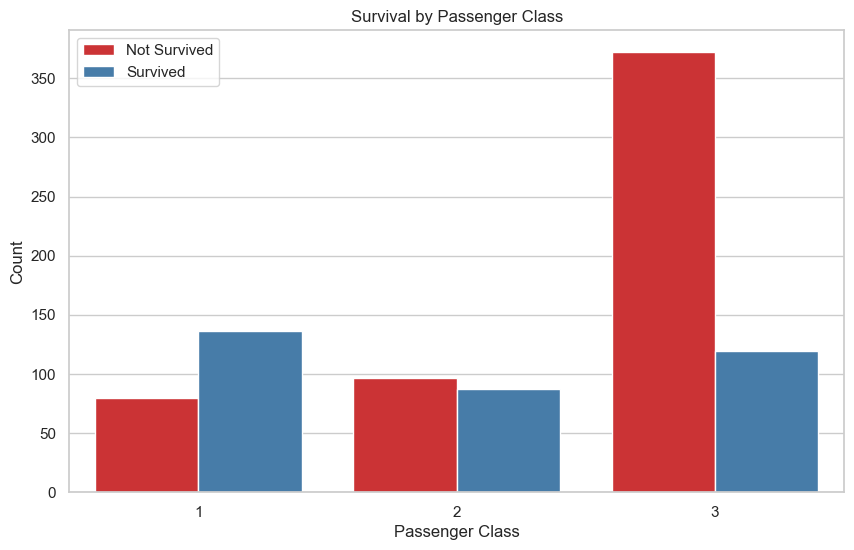

In [50]:
sns.countplot(x='PassengerClass', hue='Survived', data=df, palette='Set1')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

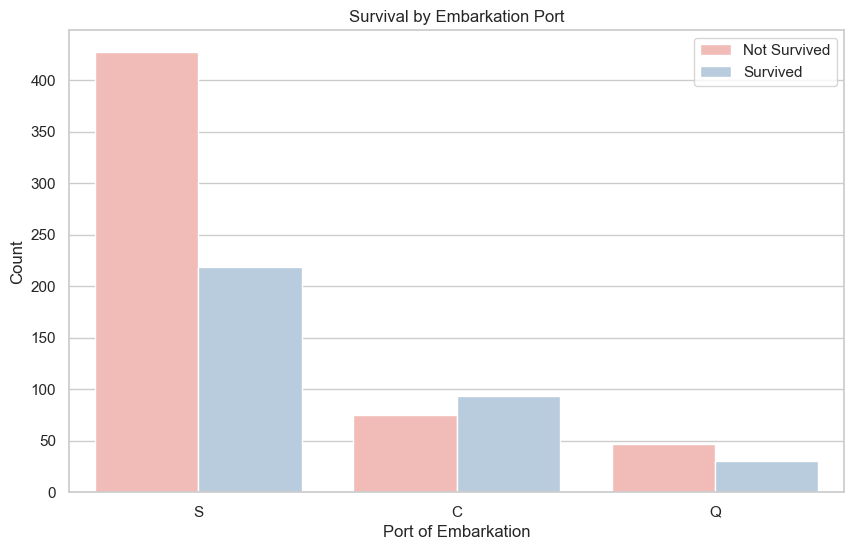

In [49]:
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Pastel1')
plt.title('Survival by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

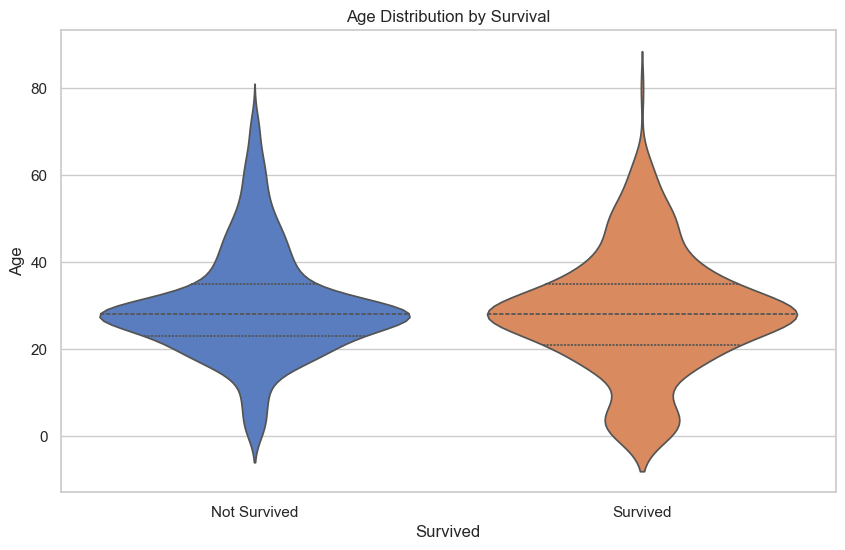

In [48]:
sns.violinplot(x='Survived', y='Age', data=df, palette='muted', inner='quartile')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

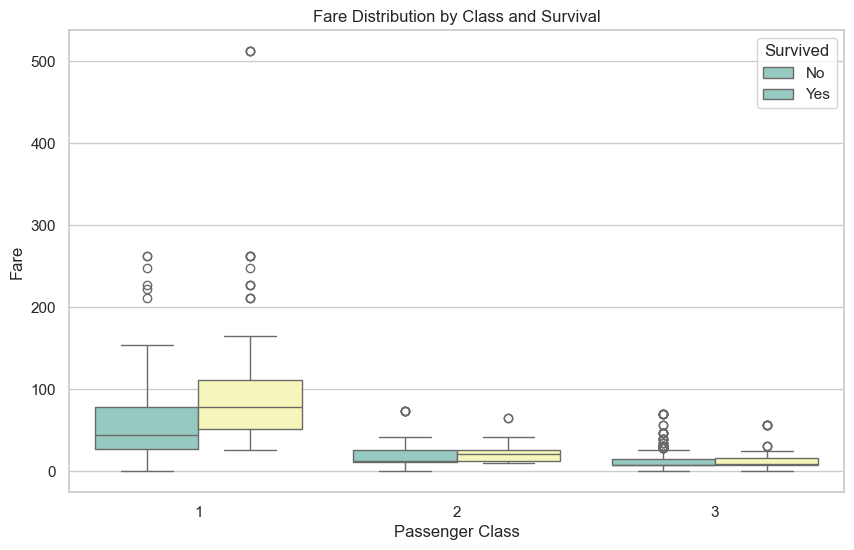

In [34]:
sns.boxplot(x='PassengerClass', y='Fare', hue='Survived', data=df, palette='Set3')
plt.title('Fare Distribution by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

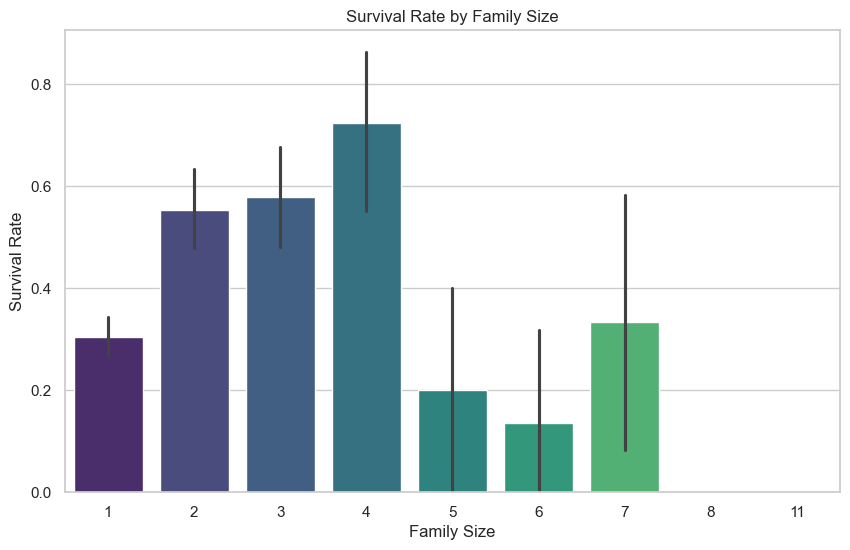

In [47]:
sns.barplot(x='FamilySize', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

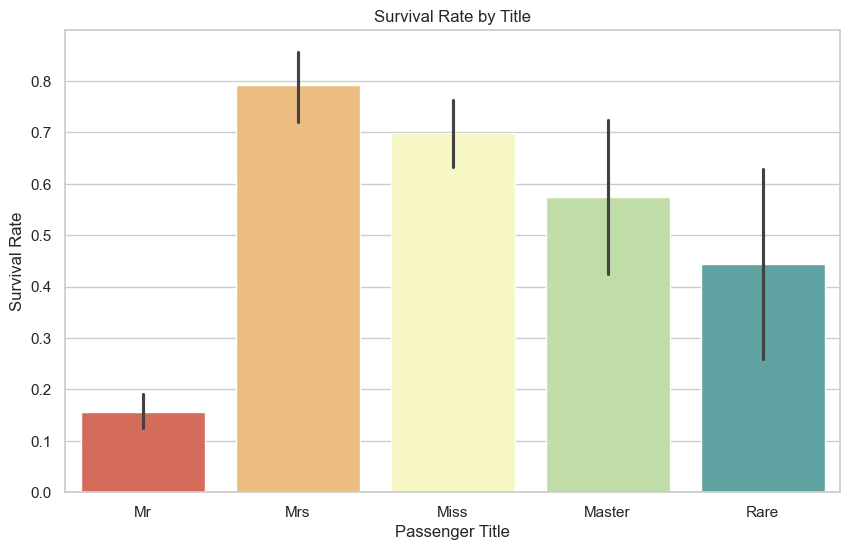

In [46]:
sns.barplot(x='Title', y='Survived', data=df, palette='Spectral')
plt.title('Survival Rate by Title')
plt.xlabel('Passenger Title')
plt.ylabel('Survival Rate')
plt.show()

### 📊 Key Visual Insights Summary

- Women had significantly higher survival rates compared to men.
- 1st class passengers survived at much higher rates than 2nd and 3rd class.
- Children (especially young boys titled "Master") were prioritized during evacuation.
- Small families (2–4 people) had better survival odds than those traveling alone or in large groups.
- Passengers from port "C" had better survival, possibly indicating socio-economic status.




In [52]:
!pip freeze > requirements.txt
